In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
import matplotlib.pyplot as plt
import random

C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

#X = tf.nn.dropout(X, keep_prob=keep_prob)

# Layer1
W1 = tf.get_variable('W1', shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# Layer2
W2 = tf.get_variable('W2', shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# Layer3
W3 = tf.get_variable('W3', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
# Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#sess.run(tf.initialize_all_variables())

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        #feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        
        avg_cost += c / total_batch #뭉치갯수로 나누기
        
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))


Epoch :  0001 cost =  0.449497110
Epoch :  0002 cost =  0.182407130
Epoch :  0003 cost =  0.136866968
Epoch :  0004 cost =  0.113212606
Epoch :  0005 cost =  0.093131899
Epoch :  0006 cost =  0.082282204
Epoch :  0007 cost =  0.073868081
Epoch :  0008 cost =  0.063884582
Epoch :  0009 cost =  0.062623031
Epoch :  0010 cost =  0.055966036
Epoch :  0011 cost =  0.051078277
Epoch :  0012 cost =  0.050337001
Epoch :  0013 cost =  0.044473015
Epoch :  0014 cost =  0.045234872
Epoch :  0015 cost =  0.043631255


Accuracy :  0.9813
Label: [9]
Prediction: [9]


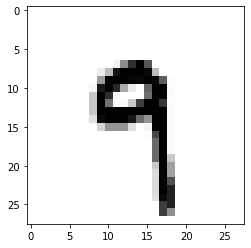

In [16]:
# TEST
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

feed_dict = {X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}
#feed_dict = {X: mnist.test.images, Y: mnist.test.labels}
print("Accuracy : ", accuracy.eval(session=sess, feed_dict=feed_dict))

r = random.randint(0, mnist.test.num_examples - 1)
print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

feed_dict = {X: mnist.test.images[r:r+1], keep_prob: 1}
#feed_dict = {X: mnist.test.images[r:r+1]}
print('Prediction:', sess.run(tf.argmax(hypothesis, 1), feed_dict=feed_dict))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [14]:
#sess.close()